# Finance & Analytics Club

## ATR (Average True Range) & Bollinger Bands

Both are volatility based indicators.

Bollinger Bands comprises of 2 lines plotted n (typically 2) standard deviation away from an m (typically 20) period simple moving average line. The bands widen during increased volatility period and shrink during decreased volatility period.

The ATR takes in account the market movement each day in either direction and averaging them out. It focuses on total price movement and conveys how wildly the market is swinging as it moves.

They are often used in conjunction since they are complimentary.

Import necessary libraries

In [9]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt

Download historical data for required stocks


In [20]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(1825),dt.date.today())
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-13,128.570007,126.610001,128.369995,126.849998,36365100.0,116.734917
2015-04-14,127.290001,125.910004,127.000000,126.300003,25524600.0,116.228790
2015-04-15,127.129997,126.010002,126.410004,126.779999,28970400.0,116.670502
2015-04-16,127.099998,126.110001,126.279999,126.169998,28369000.0,116.109131
2015-04-17,126.139999,124.459999,125.550003,124.750000,51957000.0,114.802368
...,...,...,...,...,...,...
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993


### Function to calculate True Range and Average True Range

In [21]:
df = ohlcv.copy()
n=20
df['H-L']=abs(df['High']-df['Low'])
df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
df['ATR'] = df['TR'].rolling(n).mean()
df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
df2

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2015-04-13,128.570007,126.610001,128.369995,126.849998,36365100.0,116.734917,NaN,NaN
2015-04-14,127.290001,125.910004,127.000000,126.300003,25524600.0,116.228790,10.555084,NaN
2015-04-15,127.129997,126.010002,126.410004,126.779999,28970400.0,116.670502,10.901207,NaN
2015-04-16,127.099998,126.110001,126.279999,126.169998,28369000.0,116.109131,10.429497,NaN
2015-04-17,126.139999,124.459999,125.550003,124.750000,51957000.0,114.802368,10.030869,NaN
...,...,...,...,...,...,...,...,...
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004,6.729996,17.636999
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001,21.699982,17.420498
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993,12.700012,17.041999


In [22]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1)) # (high today - previous day close), therefore shift 1
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1)) # (low today - previous day close), therefore shift 1
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()  if you wanna take exponential mean instead of rolling mean
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [23]:
df = ATR(ohlcv, 20)
df = df.dropna(axis = 0)
df

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2015-05-11,127.559998,125.629997,127.389999,126.320000,42035800.0,116.732750,9.625908,11.461861
2015-05-12,126.879997,124.820000,125.599998,125.870003,48160000.0,116.316917,10.147247,11.441469
2015-05-13,127.190002,125.870003,126.150002,126.010002,34694200.0,116.446297,10.873085,11.440063
2015-05-14,128.949997,127.160004,127.410004,128.949997,45203500.0,119.163139,12.503700,11.543773
2015-05-15,129.490005,128.210007,129.070007,128.770004,38208000.0,118.996811,10.326866,11.558573
...,...,...,...,...,...,...,...,...
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004,6.729996,17.636999
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001,21.699982,17.420498
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993,12.700012,17.041999


### Plotting TR and ATR

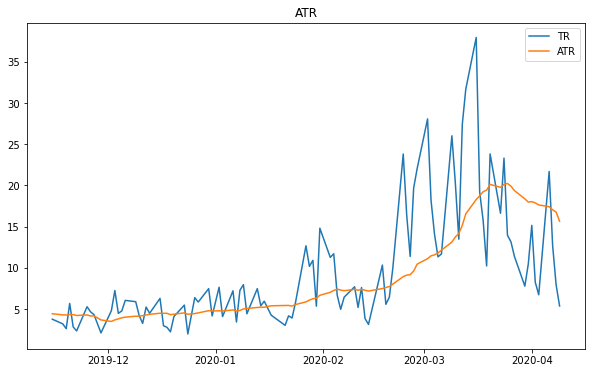

In [24]:
plt.figure(figsize = (10,6))
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('ATR')
plt.legend(('TR','ATR'),loc='best')

plt.show()

### Function to calculate Bollinger Band

In [25]:
def BollBnd(DF,n):
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df

In [26]:
df = BollBnd(ohlcv, 20)
df

,High,Low,Open,Close,Volume,Adj Close,MA,BB_up,BB_dn,BB_width
Date,,,,,,,,,,
2015-05-08,127.620003,126.110001,126.680000,127.620003,55550400.0,117.934090,117.486139,121.256355,113.715923,7.540432
2015-05-11,127.559998,125.629997,127.389999,126.320000,42035800.0,116.732750,117.486031,121.256333,113.715728,7.540604
2015-05-12,126.879997,124.820000,125.599998,125.870003,48160000.0,116.316917,117.490437,121.255053,113.725821,7.529233
2015-05-13,127.190002,125.870003,126.150002,126.010002,34694200.0,116.446297,117.479227,121.254862,113.703592,7.551270
2015-05-14,128.949997,127.160004,127.410004,128.949997,45203500.0,119.163139,117.631927,121.420572,113.843282,7.577290
...,...,...,...,...,...,...,...,...,...,...
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004,251.410001,281.167835,221.652166,59.515669
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001,251.225000,280.657719,221.792281,58.865438
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993,249.929500,275.233046,224.625954,50.607092


### Plotting Bollinger Bands

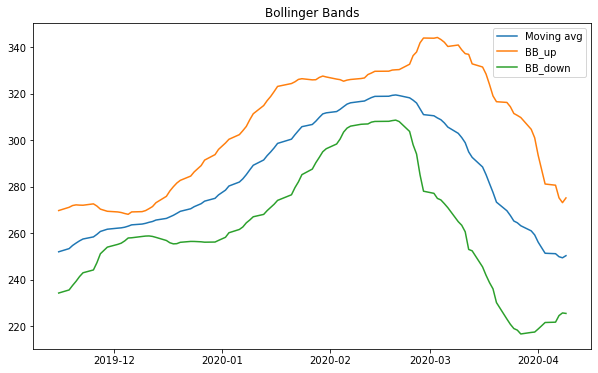

In [27]:
plt.figure(figsize = (10,6))
plt.plot(df.iloc[-100:,[-4,-3,-2]])
plt.title('Bollinger Bands')
plt.legend(('Moving avg','BB_up','BB_down'),loc='best')

plt.show()